# Importing the Dependencies

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split

# Data Collection and Processing

In [7]:
#load dataset
df_main = pd.read_csv('./Data/CAR DETAILS FROM CAR DEKHO.xls')

In [8]:
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
# checking the number of rows and columns
df_main.shape

(4340, 8)

In [10]:
# getting some information about the dataset
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
# checking the distribution of categorical data
print(df_main.fuel.value_counts()) 
print(df_main.seller_type.value_counts())
print(df_main.transmission.value_counts())
print(df_main.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


# Encoding the Categorical Data

In [12]:
# encoding "Fuel_Type" Column
df_main.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

#encoding "owner" column
df_main.replace(
    {'owner': {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car':4}}, inplace=True)

# encoding "Seller_Type" Column
df_main.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer': 2}},inplace=True)

# encoding "Transmission" Column
df_main.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
df_main.head(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1
5,Maruti Alto LX BSIII,2007,140000,125000,0,1,0,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,0,1,0,0
7,Tata Indigo Grand Petrol,2014,240000,60000,0,1,0,1
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,0,1,0,0
9,Maruti Celerio Green VXI,2017,365000,78000,2,1,0,0


# Splitting the data and Target

In [14]:
X = df_main.drop(['name','selling_price',],axis=1)
Y = df_main['selling_price']

In [15]:
X,Y

(      year  km_driven  fuel  seller_type  transmission  owner
 0     2007      70000     0            1             0      0
 1     2007      50000     0            1             0      0
 2     2012     100000     1            1             0      0
 3     2017      46000     0            1             0      0
 4     2014     141000     1            1             0      1
 ...    ...        ...   ...          ...           ...    ...
 4335  2014      80000     1            1             0      1
 4336  2014      80000     1            1             0      1
 4337  2009      83000     0            1             0      1
 4338  2016      90000     1            1             0      0
 4339  2016      40000     0            1             0      0
 
 [4340 rows x 6 columns],
 0        60000
 1       135000
 2       600000
 3       250000
 4       450000
          ...  
 4335    409999
 4336    409999
 4337    110000
 4338    865000
 4339    225000
 Name: selling_price, Length: 4340, dtyp

In [16]:
print(X)
print(Y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [17]:
print(Y.dtypes)
print(X.dtypes)

int64
year            int64
km_driven       int64
fuel            int64
seller_type     int64
transmission    int64
owner           int64
dtype: object


In [18]:
X.shape,Y.shape

((4340, 6), (4340,))

# Splitting Training and Test data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [20]:
X_train.shape,Y_train.shape

((3472, 6), (3472,))

# Model Training

**1. Linear Regression**

In [21]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [22]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [32]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
print(training_data_prediction)
print(Y_train[0])

[ 669404.06675813  500098.15418781 1361234.77432092 ...  520850.1694099
  386004.66406068  509396.7924495 ]
60000


In [33]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.423331057072869


# Visualize the actual prices and Predicted prices

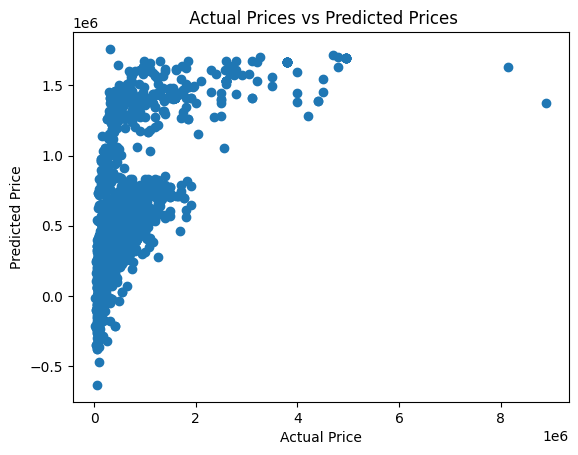

In [37]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [38]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_train)
test_data_prediction


array([ 669404.06675813,  500098.15418781, 1361234.77432092, ...,
        520850.1694099 ,  386004.66406068,  509396.7924495 ])

In [40]:
# R squared Error
error_score = metrics.r2_score(Y_train, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.423331057072869


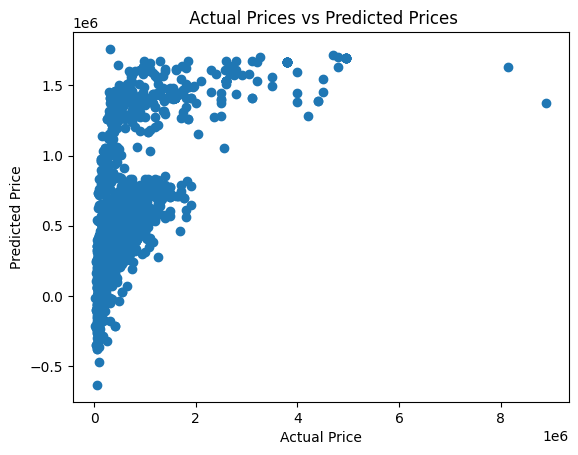

In [42]:
plt.scatter(Y_train, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### **2. Lasso Regression**

In [43]:
# loading the linear regression model
lass_reg_model = Lasso()

In [44]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

# Model Evaluation

In [46]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_test)
training_data_prediction


array([ 4.78946016e+05,  1.41542739e+06,  1.83902119e+05,  1.39072920e+06,
        7.16584530e+05,  4.84974258e+05,  3.79637275e+05, -3.39994444e+04,
        3.03731683e+05,  5.26786259e+05,  2.69156215e+05,  1.00855160e+05,
        1.29396519e+06,  5.89694409e+05, -1.62134728e+05,  1.56439900e+06,
        4.98553993e+05,  5.68349677e+05,  1.45511666e+06,  4.41141220e+05,
        4.58235803e+05,  3.32128630e+05,  1.27944117e+05,  1.18562203e+06,
        1.57243553e+06,  4.84974258e+05,  1.44494962e+06,  6.42221328e+05,
        3.50456456e+05,  9.28111916e+05,  3.63836705e+05,  4.36301539e+04,
        7.21267160e+05,  5.35224135e+05,  1.58077836e+04,  1.45511666e+06,
        4.80691943e+05,  2.80985653e+05,  5.33489927e+05,  5.65946039e+05,
        7.93889045e+05,  6.60333473e+05,  1.38404325e+06,  6.76095263e+05,
        1.53318343e+06,  3.23359156e+05,  5.28547813e+05,  5.39913518e+05,
        5.74800940e+05,  2.99600663e+05,  5.38848740e+05,  3.57150751e+05,
        4.64891372e+05,  

In [47]:
# R squared Error
error_score = metrics.r2_score(Y_test, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.48476306480201947


# Visualize the actual prices and Predicted prices

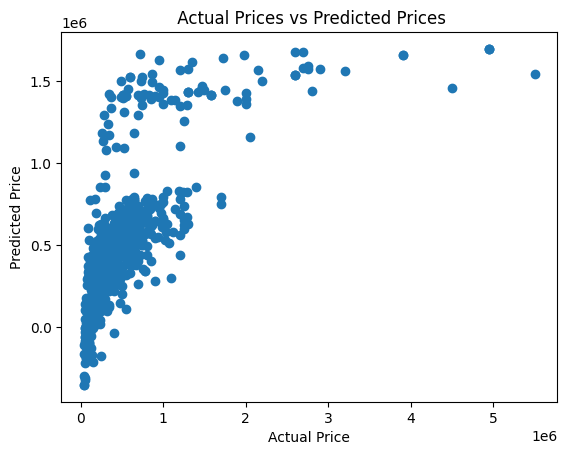

In [49]:
plt.scatter(Y_test, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [50]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [51]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.48476306480201947


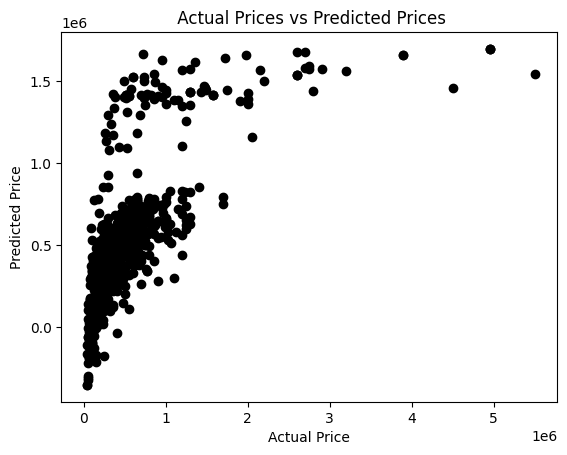

In [52]:
plt.scatter(Y_test, test_data_prediction , c='k')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.plot(error_score, c='r')
plt.show()

## 2. Logistic Regression 

In [53]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [54]:
logit=LogisticRegression(C=1.0,solver='lbfgs', multi_class='ovr')

In [55]:
logit.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr')

In [56]:
training_data_prediction = logit.predict(X_test)
training_data_prediction

array([ 300000, 3800000,  300000,  300000,  300000,  300000,  300000,
        300000,  300000,  300000,  300000,   80000,  300000,  300000,
         80000, 1580000,  300000,  300000, 3800000,  300000,  670000,
        300000,  300000,  300000,  300000,  300000, 1580000,  300000,
        300000,  300000,  300000,   80000,  300000,  300000,  300000,
       3800000,  300000,  250000,  550000,  300000,  550000,  300000,
        300000,  300000,  300000,  300000,  300000,  300000,  300000,
        300000,  550000,  300000,  300000,  300000,  300000,  300000,
        300000,  300000,  300000,  550000,  300000,  300000,  300000,
        670000,  300000,   80000,  300000,  300000,  300000,  300000,
        300000,  300000,  300000,  300000,  300000,  300000,  300000,
        300000, 3800000,  300000,  670000,  300000,  300000, 3800000,
        300000,  300000,  300000,  300000,  300000,  670000,  250000,
        300000,  300000,  300000,  300000,  300000,  300000,  300000,
        300000,  300

In [57]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.48476306480201947
